## Problem Statement:

# Predict if a loan will get approved or not using Data science 

<span style='font-family:sans-serif'><font color='purple'><b><i> This is a classification problem as we need to classify whether the Loan_Status is yes or no.
The company wants to automate the loan eligibility process (real time) based on customer detail 
provided while filling online application form. These details are Gender, Marital Status, Education,Number of Dependents, Income, Loan Amount, Credit History and others </font></b></i></span>

<hr>

### Steps involved in designing the model

 <font color='#FF3396'><b>1. Data Preprocessing/Preparation</font><br>
 <font color='#FF3396'><b>2. Building model</font><br>
 <font color='#FF3396'><b>3. Evaluation of model</font> <br>
 <font color='#FF3396'><b>4. Making Predictions using the model</font>

## Step-1: Preprocessing the data

 - <font color='#FF3396'><b>Importing libraries</font>
 - <font color='#FF3396'><b>Getting the dataset</b></font>
 - <font color='#FF3396'><b>Finding Missing Data</b></font>
 - <font color='#FF3396'><b>Encoding Categorical Data</b></font>
 - <font color='#FF3396'><b>Feature selection</b></font>
 - <font color='#FF3396'><b>Splitting dataset into training and test set</b></font>


<font color='#FF3345'><b>Importing Packages</b></font>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font color='#FF3345'><b>Getting the dataset</b></font>

In [99]:
#reading data from csv file
df=pd.read_csv(r"C:\Users\KIIT\Documents\my_csv_files\Loan.csv")
df.shape

(614, 13)

In [100]:
#viewing initial 30 records
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<font color='green'>There are altogether 13 columns in our data set. Of them Loan_Status is the response variable and rest all are the variables /factors that decide the approval of the loan or not.</font>

In [101]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<font color='#FF3345'><b>Handling missing data</b></font>

In [102]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [103]:
#checking total missing values in each column of dataset
total=df.isnull().sum()
total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [104]:
#Checking how many male and females are there under gender column
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<font color='green'>It is observed that the no. of males are 4 times than that of females so 
we fill the missing values under gender with 'male'</font>

In [105]:
df.Gender=df.Gender.fillna('Male')

In [106]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [107]:
df.Married=df.Married.fillna('Yes')

In [108]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [109]:
df.Dependents=df.Dependents.fillna('0')

In [110]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [111]:
df.Self_Employed=df.Self_Employed.fillna('No')

In [112]:
#filling missing values under LoanAmount with mean of all loan amounts
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

In [113]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [114]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(360.0)

In [115]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [116]:
df.Credit_History=df.Credit_History.fillna(1.0)

In [117]:
total=df.isnull().sum()
total

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<font color='#FF3345'><b>Encoding Categorical data</b></font>

<font color='red'>Converting the labels into numeric form so as to convert it into the machine readable form</font>

In [118]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [119]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


<font color='#FF3345'><b>Feature Selection </b></font>

<font color='red'>dividing the given columns into two types of variables:dependent(or target variable) 
and independent variable(or feature variables) </font>

In [120]:
X = df.iloc[:,1:12] #selecting all rows from first index column to 11th index column
y = df.iloc[:,12] #selecting last index column(loan status)

<font color='#FF3345'><b>Splitting dataset into training and test set</b></font>

<font color='red'>To understand model performance,we divide the dataset into a training set and a test set </font>

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
#here dataset is divided in ratio of 80:20 i.e 80% of data used for model training and 20% for model testing

## Step-2: Building model

### DECISION TREE

In [122]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [123]:
y_pred #predicted values

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [124]:
y_test #actual values

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

## Step-3: Evaluation of model

In [125]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[18, 15],
       [24, 66]], dtype=int64)

Text(0.5, 15.0, 'predicted value')

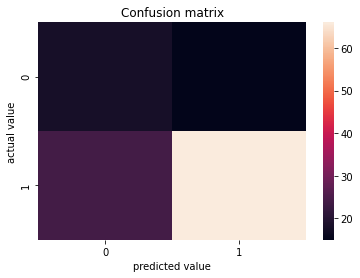

In [126]:
#visualizing confusion matrix using heatmap
import pandas as pd
import seaborn as sn
%matplotlib inline
sn.heatmap(pd.DataFrame(cnf_matrix))
plt.title('Confusion matrix')
plt.ylabel('actual value')
plt.xlabel('predicted value')

<font color='green'>84 values are predicted correctly out of 123 values</font>

In [127]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6829268292682927


<font color='green'>We observe that the model is giving 69% accuracy so we try another
model which will give us better accuracy</font>

### LOGISTIC REGRESSION

In [128]:
from sklearn.linear_model import LogisticRegression

In [131]:
#fit model on the training set 
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,y_train)
#predict on test data
y_pred=logistic_regression.predict(X_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, 
y_pred)
print(cnf_matrix)

[[15 18]
 [ 2 88]]


<font color='green'> Diagonal values represent accurate predictions, while non-diagonal 
elements are inaccurate predictions. In the output, 15 and 88 are actual predictions, and 18 and 2 are 
incorrect predictions.This means out of 123, we got 103 correct prediction and 20 incorrect prediction</font>

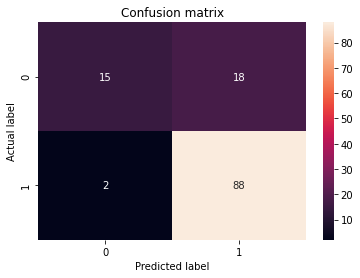

In [136]:
import seaborn as sn
sn.heatmap(cnf_matrix, annot=True)
plt.title('Confusion matrix') 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')
plt.show()

In [137]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8373983739837398


<font color='green'>The classification rate is 83.73% using Logistic regression algorithm
which is considered as good accuracy.</font>

## Step-4: Making Predictions
<hr>
<font color='purple'>Predicting whether the loan will get approved or not for a person who 
is applying for the loan with the following details:<br>
Gender : Male<br>
Married: Yes<br>
Dependents: 1<br>
Education: Graduate<br>
Self_Employed: No<br>
ApplicantIncome: 8000<br>
CoapplicantIncome: 2000<br>
LoanAmount (in thousand): 130<br>
Loan_Amount_Term(Term of loan in months): 24<br>
Credit_History: 0.0<br>
Property_Area (Urban/ Semi Urban/ Rural): Urban</font>

In [139]:
#Convert the categorical variable value into numeric form.
loan_status = logistic_regression.predict([[1,1,1,0,0,8000,2000,130,24,0.0,2]])
print(loan_status)

[1]


<font color='#FF3396'>This means that the loan get approved for the person and he will get the loan.</font>